In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import mathieu_a, mathieu_b, mathieu_cem, mathieu_sem 
from scipy.special import eval_hermite
import seaborn as sb

In [8]:
#plt.rc("font", family=["Helvetica", "Arial"])
#plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14}) # 14
plt.rc('text', usetex=True)
plt.rc("axes", labelsize=24) # 18
plt.rc("xtick", labelsize=22, top=True, direction="in") 
plt.rc("ytick", labelsize=22, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=18)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 7.5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.major.size'] = 7.5
plt.rcParams['ytick.minor.size'] = 3

In [3]:
#m1 = 1/2
#l1 = np.sqrt(2)
M1 = 1/2 #m1*l1**2
hbar = 1
g1 = 1
omega1 = np.sqrt(2) #np.sqrt(g1/l1)
factor1 = hbar**2/(2*M1)

#m2 = 5
#l2 = 1
M2 = 1/2 #m2*l2**2
g2 = 1
omega2 = np.sqrt(30) #1 #np.sqrt(g2/l2)
factor2 = hbar**2/(2*M2)

In [4]:
N = 2500
d_phi = 2*np.pi/N
phi = np.array([d_phi*i - np.pi for i in range(N)])
lambd1 = hbar**2/(2*M1*d_phi**2)
lambd2 = hbar**2/(2*M2*d_phi**2)

V1 = lambda phi: M1*omega1**2*(1 - np.cos(phi))
v1 = V1(phi)/lambd1

V2 = lambda phi: M2*omega2**2*(1 - np.cos(phi))
v2 = V2(phi)/lambd2

H1 = np.zeros((N, N))
for i, row in enumerate(H1):
    row[i] = 2 + v1[i]
    row[i-1] = -1
    if i < N-1:
        row[i+1] = -1
    else:
        row[0] = -1 
H1 *= lambd1

H2 = np.zeros((N, N))
for i, row in enumerate(H2):
    row[i] = 2 + v2[i]
    row[i-1] = -1
    if i < N-1:
        row[i+1] = -1
    else:
        row[0] = -1 
H2 *= lambd2
        
epsilon1, psi1 = np.linalg.eigh(H1)
epsilon2, psi2 = np.linalg.eigh(H2)

0.9999999999999998
1.0


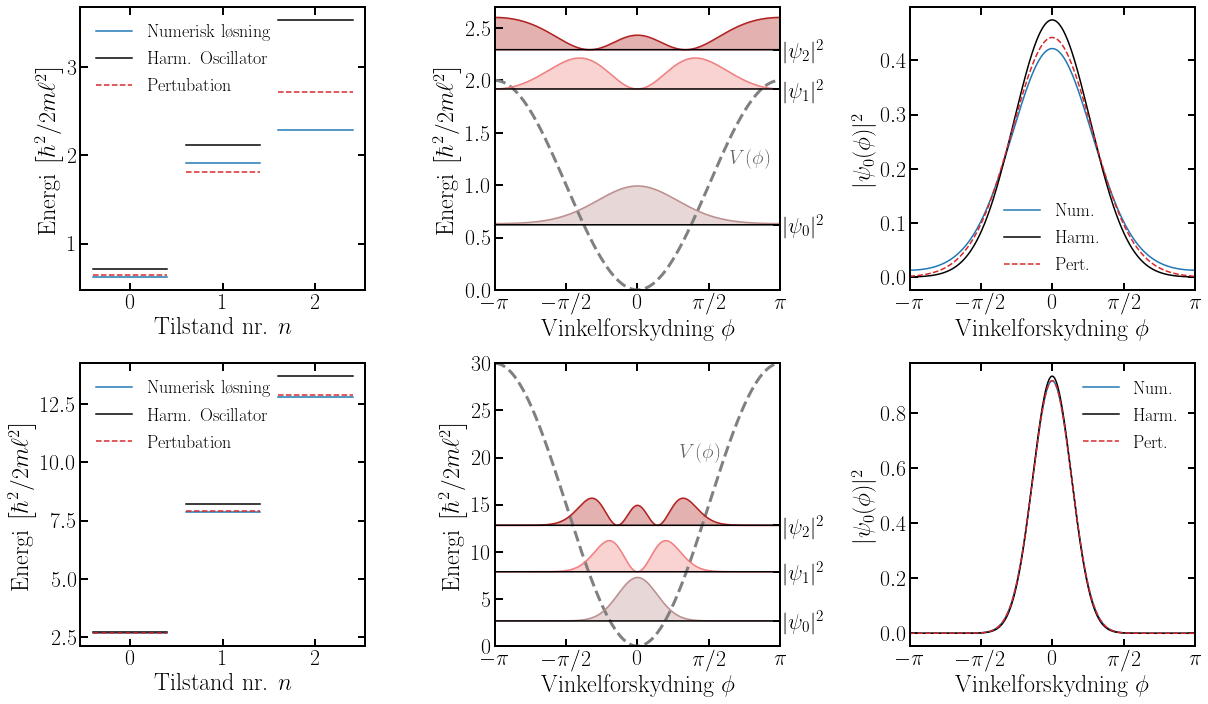

In [15]:
#### ENERGIER ####
E_num1 = epsilon1/factor1
E_num2 = epsilon2/factor2

E1_0 = np.array([hbar*omega1*(n + 1/2) for n in range(N)])/factor1
E1_1 = np.array([-(hbar**2/(32*M1))*(2*n**2 + 2*n + 1) for n in range(N)])/factor1
E1_pert = E1_0 + E1_1

E2_0 = np.array([hbar*omega2*(n + 1/2) for n in range(N)])/factor2
E2_1 = np.array([-(hbar**2/(32*M2))*(2*n**2 + 2*n + 1) for n in range(N)])/factor2
E2_pert = E2_0 + E2_1

#### PLOT SHIT ####
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(17, 10))
for i in range(3):
    x = np.linspace(i - 2/5, i + 2/5)
    axs[0,0].plot(x, [E_num1[i]]*len(x), color='tab:blue', label='Numerisk løsning')
    axs[0,0].plot(x, [E1_0[i]]*len(x), color='k', label='Harm. Oscillator')
    axs[0,0].plot(x, [E1_pert[i]]*len(x), color='tab:red', ls='--', label='Pertubation')
    axs[1,0].plot(x, [E_num2[i]]*len(x), color='tab:blue', label='Numerisk løsning')
    axs[1,0].plot(x, [E2_0[i]]*len(x), color='k', label='Harm. Oscillator')
    axs[1,0].plot(x, [E2_pert[i]]*len(x), color='tab:red', ls='--', label='Pertubation')
    if i < 1:
        axs[0,0].legend(frameon=False)
        axs[1,0].legend(frameon=False)
        
    
X = np.linspace(-np.pi, np.pi, N)
E_pot1 = lambda x: M1*omega1**2*(1 - np.cos(x))/factor1
E_pot2 = lambda x: M2*omega2**2*(1 - np.cos(x))/factor2
axs[0,1].plot(X, E_pot1(X), color='gray', ls='--', lw=3)
axs[1,1].plot(X, E_pot2(X), color='gray', ls='--', lw=3)


cs = ['rosybrown', 'lightcoral', 'firebrick', 'maroon']
for i in range(3):
    EE1 = [E_num1[i]]*len(phi)
    axs[0,1].plot(phi,  EE1 + 350*psi1[:,i]**2, color=cs[i])
    axs[0,1].fill_between(phi, EE1 + 350*psi1[:,i]**2, EE1[0], color=cs[i], alpha=0.35)
    axs[0,1].plot(phi, EE1, color='k')
    
    EE2 = [E_num2[i]]*len(phi)
    axs[1,1].plot(phi,  EE2 + 2000*psi2[:,i]**2, color=cs[i])
    axs[1,1].fill_between(phi, EE2 + 2000*psi2[:,i]**2, EE2[0], color=cs[i], alpha=0.35)
    axs[1,1].plot(phi, EE2, color='k')
    

#axs[0].set_ylim(0.5, 3.55)
#axs[0].set_xticks([0, 1, 2])
axs[0,0].set_xlabel('Tilstand nr. $n$')
axs[0,0].set_ylabel(r'Energi $\left[\hbar^2/2m\ell^2\right]$')
axs[1,0].set_xlabel('Tilstand nr. $n$')
axs[1,0].set_ylabel(r'Energi $\left[\hbar^2/2m\ell^2\right]$')

axs[0,1].set_xlabel('Vinkelforskydning $\phi$')
axs[0,1].set_ylabel(r'Energi $\left[\hbar^2/2m\ell^2\right]$')
axs[0,1].set_xlim(-np.pi, np.pi)
axs[0,1].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axs[0,1].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axs[0,1].text(0.65*np.pi, 1.2, '$V(\phi)$', fontsize=20, color='dimgray')
axs[0,1].set_ylim(0, 2.7)

axs[1,1].set_xlabel('Vinkelforskydning $\phi$')
axs[1,1].set_ylabel(r'Energi $\left[\hbar^2/2m\ell^2\right]$')
axs[1,1].set_xlim(-np.pi, np.pi)
axs[1,1].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axs[1,1].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axs[1,1].text(0.3*np.pi, 20, '$V(\phi)$', fontsize=20, color='dimgray')
axs[1,1].set_ylim(0, 30)

ax2 = axs[0,1].twinx()
ax2.set_yticks([E_num1[0], E_num1[1], E_num1[2]])
ax2.set_yticklabels(['$|\psi_0|^2$', '$|\psi_1|^2$', '$|\psi_2|^2$'])#(['1', '2', '3'])
ax2.set_ylim(0, 2.7)

ax4 = axs[1,1].twinx()
ax4.set_yticks([E_num2[0], E_num2[1], E_num2[2]])
ax4.set_yticklabels(['$|\psi_0|^2$', '$|\psi_1|^2$', '$|\psi_2|^2$'])#(['1', '2', '3'])
ax4.set_ylim(0, 30)


####  BØLGEFUNKTIONER!!!!! ####

D = phi

def HS(M, omega, n, phi):
    xi = np.sqrt(M*omega/hbar)*phi
    const = (M*omega/(np.pi*hbar))**(1/4)*1/np.sqrt(2**n*np.math.factorial(n))
    return const*np.exp(-xi**2/2)*eval_hermite(n, xi)

A_1 = lambda n: 1/np.sqrt(np.trapz(psi1[:,n]**2, phi))
N_psi_1 = lambda n: A_1(n)*psi1[:,n]
N_psi_1_2 = lambda n: N_psi_1(n)**2

psi_osc_1 = lambda n, x: (1/np.sqrt(2**n*np.math.factorial(n)))*((M1*omega1)/(np.pi*hbar))**(1/4)*np.exp(-M1*omega1*x**2/(2*hbar))*eval_hermite(n, np.sqrt(M1*omega1/hbar)*x)
N_psi_osc_1_2 = lambda n, x: HS(M1, omega1, n, x)

pertubation_1 = HS(M1, omega1, 0, phi) + hbar/(96*M1*omega1)*(3*np.sqrt(2)*HS(M1, omega1, 2, phi) + np.sqrt(3/2)*HS(M1, omega1, 4, phi))
pert_1 = 1/np.trapz(pertubation_1**2, D)*pertubation_1**2
     

A_2 = lambda n: 1/np.sqrt(np.trapz(psi2[:,n]**2, phi))
N_psi_2 = lambda n: A_2(n)*psi2[:,n]
N_psi_2_2 = lambda n: N_psi_2(n)**2

psi_osc_2 = lambda n, x: (1/np.sqrt(2**n*np.math.factorial(n)))*((M2*omega2)/(np.pi*hbar))**(1/4)*np.exp(-M2*omega2*x**2/(2*hbar))*eval_hermite(n, np.sqrt(M2*omega2/hbar)*x)
N_psi_osc_2_2 = lambda n, x: (1/np.trapz(psi_osc_2(n, D)**2, D))*psi_osc_2(n, x)**2

#pertubation_2 = psi_osc_2(0, phi) + hbar/(96*M1*omega1)*(3*np.sqrt(2)*psi_osc_2(2, D) + np.sqrt(3/2)*psi_osc_2(4, D))
#pert_2 = 1/np.trapz(pertubation_2**2, D)*pertubation_2**2

pertubation_2 = HS(M2, omega2, 0, phi) + hbar/(96*M2*omega2)*(3*np.sqrt(2)*HS(M2, omega2, 2, phi) + np.sqrt(3/2)*HS(M2, omega2, 4, phi))
pert_2 = 1/np.trapz(pertubation_2**2, D)*pertubation_2**2

'''
print(np.trapz(pert_1, D))
print(np.trapz(N_psi_1_2(0, phi), phi))
print(np.trapz(N_psi_osc_1_2(0, phi), phi))

print(np.trapz(pert_2, D))
print(np.trapz(N_psi_2_2(0, phi), phi))
print(np.trapz(N_psi_osc_2_2(0, phi), phi))
'''

print(np.trapz(N_psi_1_2(0), phi))
print(np.trapz(pert_2, phi))

#### PLOT MERE SHIT #### 

axs[0,2].plot(phi, N_psi_1_2(0), color='tab:blue', label='Num.')
axs[0,2].plot(phi, HS(M1, omega1, 0, phi)**2, color='k', label='Harm.')
axs[0,2].plot(D, pert_1, color='tab:red', ls='--', label='Pert.')
axs[0,2].set_xlabel('Vinkelforskydning $\phi$')
axs[0,2].set_ylabel('$|\psi_0(\phi)|^2$')
axs[0,2].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axs[0,2].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axs[0,2].set_xlim(-np.pi, np.pi)
axs[0,2].legend(frameon=False)

axs[1,2].plot(phi, N_psi_2_2(0), color='tab:blue', label='Num.')
axs[1,2].plot(D, HS(M2, omega2, 0, phi)**2, color='k', label='Harm.')
axs[1,2].plot(D, pert_2, color='tab:red', ls='--', label='Pert.')
axs[1,2].set_xlabel('Vinkelforskydning $\phi$')
axs[1,2].set_ylabel('$|\psi_0(\phi)|^2$')
axs[1,2].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axs[1,2].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axs[1,2].set_xlim(-np.pi, np.pi)
axs[1,2].legend(frameon=False)

plt.tight_layout()
plt.savefig('los_bølgefunktionos.jpeg', format='jpeg', dpi=200)
plt.show()

# print(E_0[0], E_pert[0])

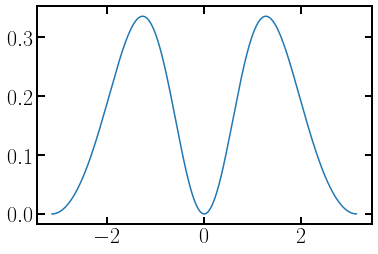

In [6]:
#plt.plot(phi, (1/np.trapz(psi1[:,1], phi))*psi1[:,1])
plt.plot(phi, N_psi_1_2(1))


In [7]:
print(np.trapz(N_psi_osc_1(1, phi)))
plt.plot(phi, N_psi_osc_1(1, phi))

NameError: name 'N_psi_osc_1' is not defined

# Koblet LC-kredsløb

In [ ]:
N = 2000


H = np.zeros((N, N))
for i, row in enumerate(H):
    row[i] = 2 + U[i]
    row[i-1] = -1
    if i < N-1:
        row[i+1] = -1
    else:
        row[0] = -1 
H *= lambd
        
E, psi = np.linalg.eigh(H)